# **LOGISTIC REGRESSION**

# Import Libraries and Load Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Uni Lab/Logistic Regression/user_data.csv")
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Check for Missing Values Column-Wise

In [5]:

print(data_set.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


# Select Features and Target

In [6]:
x = data_set.iloc[:,[2,3]].values #age,salary
y = data_set.iloc[:,4].values

# Split Data into Training and Testing

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

# Make Predictions on Test Data

In [13]:
# Predict test results
y_pred = classifier.predict(x_test)

# Show predictions
print("Predicted:", y_pred)
print("Actual   :", y_test)


Predicted: [0 0 0 0]
Actual   : [0 1 0 1]


# Evaluate with Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[2 0]
 [2 0]]
Accuracy: 0.5


# Visualize the Training Set Results

<ipython-input-15-259487203881>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


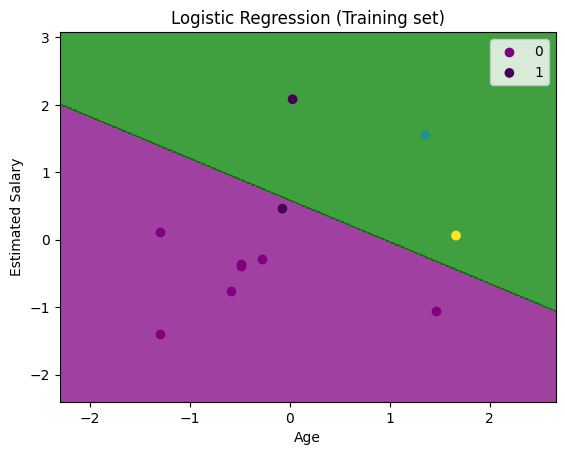

In [15]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75, cmap=ListedColormap(('purple', 'green'))
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# Visualize the Test Set Results

<ipython-input-17-08ea9e5cb8ae>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


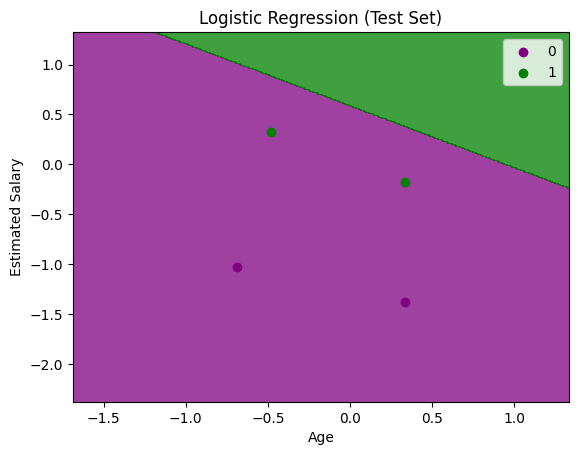

In [17]:
X_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    x1, x2,
    classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75, cmap=ListedColormap(('purple', 'green'))
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)

plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
